# Supervised Learning - Classification

# Agenda
- What is Classification
- Applications of Classification
- Types of Classification
- Binary Classification
  - Logistic Regression
    - Mathematical Concept
    - Example with Breast Cancer Dataset
  - Performance metrics in Classification
    - Confusion Matrix
      - Accuracy
      - Precision
      - Recall
      - F1 Score
      - Specificity
   - Naive Bayes Classifier
     - Mathematical Concept
     - Example with Breast Cancer Dataset
   - K Nearest Neighbors(KNN)
     -  Apply KNN on Breast Cancer Dataset
     -  Hyperparameter Tuning of KNN
   - Decision Tree
     - How Decision Tree Works
     - Metrics for Splitting
     - Pruning
     - Apply DecisionTree on Breast Cancer Data
     - Hyperparameter Tuning Decision Tree
   - Support Vector Machine (SVM)
     - Apply SVM on Breast Cancer Data
     - Hyperparameter Tuning

## Classification
Classification is a supervised Machine Learning Technique where the model s trained to predict the class label of a given input data. It looks for a decision boundary, which divides the data into different classes. This implies the target variable is of categorical nature(Text, finite discrete numbers)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Classification.png)

## Applications of Classification
- **1.HealthCare**
- **2.Finance**
- **3.Marketing**
- **4.Retail**
- **5.Manufacturing** 

# Types of Classification
- Binary Classification -  When the target variable has only 2 classes (Male/Female, Yes/No, 0/1, Black/White etc)
- Multiclass Classification - When the target variable has more than 2 classes(Species of flowers, M/F/T )
- Multilabel Classification - When there are multiple targets for 1 input (Obect Detection, Face Recognition)
- Imbalanced Class Classification -  when one of the class outnumbers other classes significantly

## Binary Class Classification

Binary classification is the most simple type of classification, where the model predicts one of two possible outcomes. For example, yes or no, true or false, spam or not spam.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Machine_learning.png)

Some popular algorithms used for binary classification are:
- Logistic Regression(preferred for binary class only)
- Naïve Bayes
- K-Nearest Neighbors (KNN)
- Decision Trees
- Support Vector Machines (SVM)


While these methods excel in binary settings, they are equally capable of handling multi-class classification tasks. This versatility allows them to be used in a wider range of applications, such as recognizing multiple categories of objects in images or predicting several types of customer behavior.

## Logistic Regression

**Logistic regression** is a supervised machine learning technique primarily used for binary classification. In this method, we apply the sigmoid function to the linear combination of independent variables/predictors (features). This produces a probability value between 0 and 1. This probability represents the likelihood of a datapoint belonging to a specific class (e.g., positive or negative outcome).If the estimated probability isgreater than 0.5, then the model predicts that the instance belongs to a positive class labeled “1” or else it predicts that it does not (i.e., itbelongs to the negative class, labeled “0”). This makes it a binary classifier.

## Mathematical Concept

**1. Logistic Function (Sigmoid Function):**
The Core of logistic regression is the logistic function, also known as sigmoid function (denoted by $\sigma(z)$ ) which maps any real valued number into the range (0,1)
$$\sigma(z) =  \frac{1}{1+ e^{-z}}$$

where `z` is a linear combination of input features. This function outputs the probability of the input belonging to the positive class(class 1) 

**2. Linear Combination of inputs:**
The input features `X` are combined linearly using weights `w` and a bias term `b`
$$z =  w \cdot X + b $$

**3. Prediction:**
The logisic Regression model predicts the probability of the class being positive or negative( class 1 or 0)
$$\sigma(z) = P(y=1 \mid X) =   \frac{1}{1+ e^{-(w \cdot X + b)}}$$

to make final binary decision, a Threshold (usually 0.5) is applied to this probability. if $\sigma(z)$ >=0.5, the prediction is class 1 other wise class 0


**4. Cost Function:**
The cost function  used in logistic regression is the binary cross entropy(logloss), which measure the discrepancy between the predicted probabilities and the actual class labels
$$
J(w,b) = -\frac{1}{m} \sum_{i=1}^m \left[y_{(i)} \log(\hat{y}_{(i)}) + (1-y_{(i)})\log(1- \hat{y}_{(i)})\right]
$$

where,<br>
- m is the number of training samples
- $ y_{(i)}$ is the true label for $i^{th}$ example
- $ \hat{y}_{(i)}$ is the predicted probability for $i^{th}$ example


**5. Optimization:**
 The goal is to find the weights `w` and bias `b` that minimizes the cost function. This is typically done through Gradient descent.


### Example with Breast Cancer Dataset
## Dataset Description

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in the field of machine learning, particularly in classification problems related to medical diagnosis.This dataset consists of breast cancer cases derived from a group of patients who underwent surgery and had their breast mass tissue sampled.
**Number of Instances:** It contains 569 instances, each representing an individual sample of breast tissue.
**Number of Attributes:** There are 30 numeric attributes computed from digitized images of the tissue samples. These attributes are measurements of the cell nuclei present in the images.

**The attributes include:**- Radius (mean of distances from center to points on the perimeter)- Texture (standard deviation of gray-scale values)- Perimeter- Area- Smoothness (local variation in radius lengths)- Compactness (perimeter^2 / area - 1.0)- Concavity (severity of concave portions of the contour)- Concave points (number of concave portions of the contour)- Symmetry- Fractal dimension ("coastline approximation" - 1)- The target variable, `diagnosis`, indicates the cancer type, which can be "M" (Malignant) or "B" (Benign). The objective is to predict whether the tissue sample is benign or malignant

lets first start with the implementation of logistic regression.

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
df = pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# drop id, Unnamed: 32 columns

df =  df.drop(columns = ['id', 'Unnamed: 32'])

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Check for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No Missing Values

In [7]:
# Distribution of the target Variable

df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

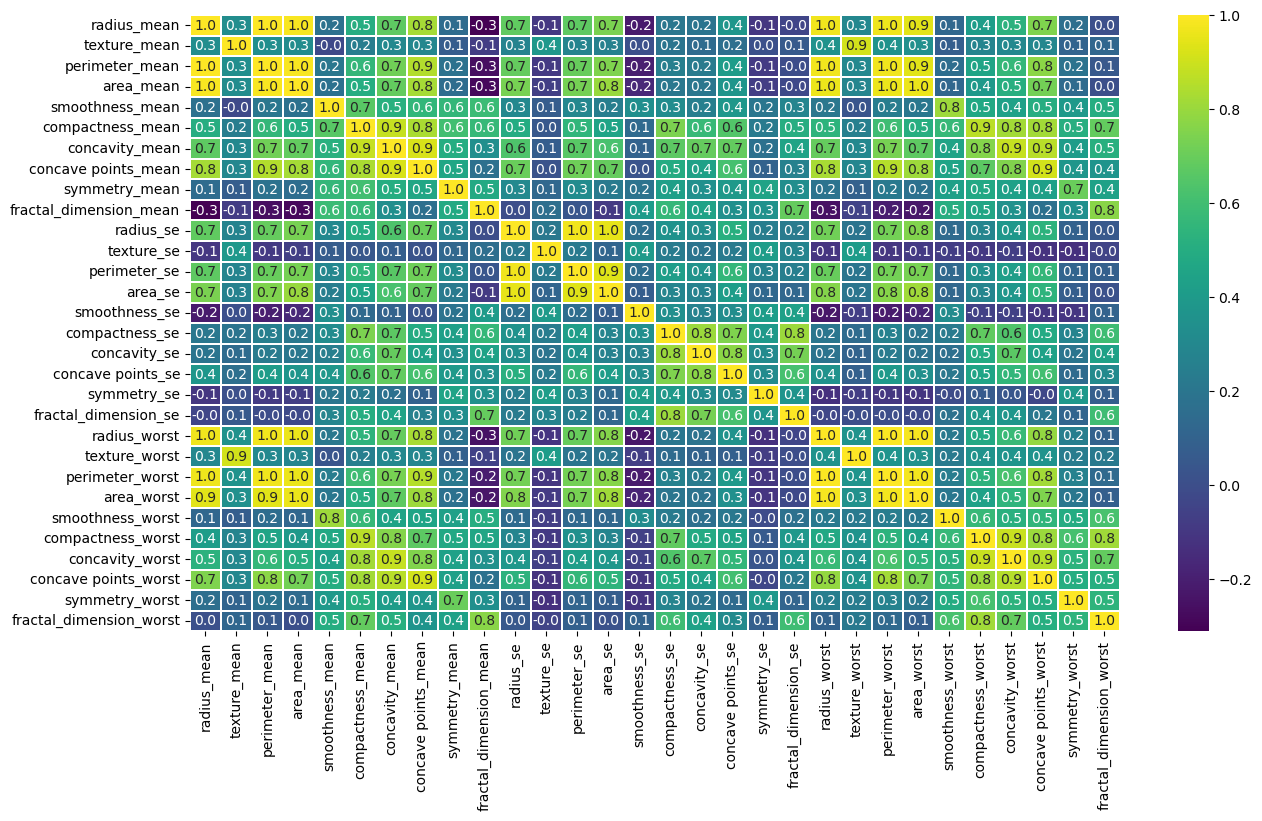

In [10]:
# Plot the correlation heatmap

corr_mat =  df.corr(numeric_only = True)
plt.figure(figsize = (15,8))
sns.heatmap(corr_mat, annot = True, fmt= ".1f", linewidths = 0.25,cmap = 'viridis')
plt.show()